# Impact of Training Hours to Employee Performance

## BUILDING MODELS

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

#sns.set_style("whitegrid")
#sns.set_context("paper")

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, RobustScaler

### Load Dataset

In [4]:
df = pd.read_csv('Training Dataset.csv', index_col=0)
df.head()

,Employee Code,Organization,Department or Branch,Functional Title,Rank,Employee Status,Performance_Rating,Tenure,Total Training Hours,Core Training Hours,Function Specific Training Hours,Leadership & Management Training Hours,External Training Hours,Internal Training Hours,Budget per Trainee
0,13-0101,SHARED SERVICES,Marketing Department,Marketing Consumer Insights & Activation,Mgr,Regular,2.95,17,46.0,2.0,0.0,44.0,0.0,46.0,40000
1,92-0301,RETAIL,Operations Department,Operations Reinsurance Administration,Mgr,Regular,3.30,15,18.0,2.0,0.0,16.0,0.0,18.0,40000
2,06-0801,SHARED SERVICES,IT Life Applications Development Section,IT Life Applications Development Programming M...,Mgr,Regular,2.94,10,18.0,2.0,0.0,16.0,0.0,18.0,40000
3,11-0107,RETAIL,Microinsurance Department,Microinsurance Accounts,Supv,Regular,2.91,17,29.0,5.0,0.0,24.0,0.0,29.0,20000
4,CP161108,RETAIL,Microinsurance Department,Partner Relationship Staff Assistant,Staff II,Regular,2.65,2,2.0,2.0,0.0,0.0,0.0,2.0,10000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 15 columns):
Employee Code                             565 non-null object
Organization                              565 non-null object
Department or Branch                      565 non-null object
Functional Title                          565 non-null object
Rank                                      565 non-null object
Employee Status                           565 non-null object
Performance_Rating                        565 non-null float64
Tenure                                    565 non-null int64
Total Training Hours                      565 non-null float64
Core Training Hours                       565 non-null float64
Function Specific Training Hours          565 non-null float64
Leadership & Management Training Hours    565 non-null float64
External Training Hours                   565 non-null float64
Internal Training Hours                   565 non-null float64
Budget per Trainee   

In [37]:
df.describe()

,Performance_Rating,Tenure,Total Training Hours,Core Training Hours,Function Specific Training Hours,Leadership & Management Training Hours,External Training Hours,Internal Training Hours,Budget per Trainee
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,2.902168,10.223009,16.254867,5.670796,2.619469,7.964602,1.876106,14.378761,29415.929204
std,0.305902,7.158774,15.593762,8.508107,6.431746,13.299556,6.466406,14.323822,23456.132915
min,1.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,10000.000000
50%,2.960000,10.000000,12.000000,2.000000,0.000000,0.000000,0.000000,8.000000,20000.000000
75%,3.100000,15.000000,24.000000,5.000000,0.000000,16.000000,0.000000,21.000000,40000.000000
max,3.500000,27.000000,82.000000,56.000000,80.000000,64.000000,80.000000,68.000000,100000.000000


### Data Prepration: Feature Scaling

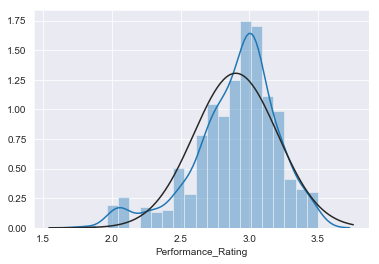

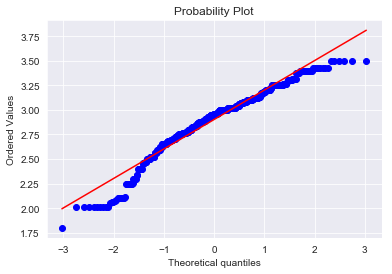

In [15]:
#histogram and normal probability plot
sns.set_style('darkgrid')

sns.distplot(df['Performance_Rating'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Performance_Rating'], plot=plt)

In [5]:
scaler = RobustScaler()

In [6]:
#Create dataframe of only numeric (integer & float) features
df_num = df.select_dtypes(include=['int64','float64'])

In [7]:
numerical_features = df_num.columns
df_scaled = df.copy()
df_scaled.loc[:, numerical_features] = scaler.fit_transform(df.loc[:, numerical_features])

### Build the Model

#### Clustering

### K MEANS CLUSTERING

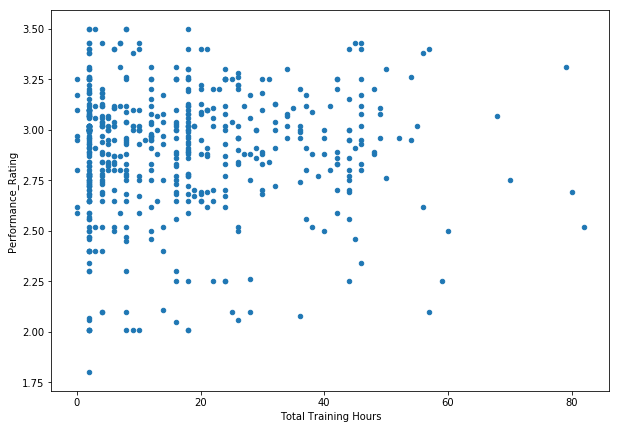

In [4]:
#Plot/Visualize the Data
df.plot(x='Total Training Hours', y='Performance_Rating',kind='scatter', figsize=(10,7))

### Test with k=3 with not scaled data

In [79]:
df_temp = df[['Total Training Hours', 'Performance_Rating']]

In [8]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(df_temp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [9]:
#Output of K-Means is the cluster label
k3_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k3 = df_temp.copy()
df_k3['Label'] = k3_labels

In [10]:
#View the dataset
df_k3.head()

,Total Training Hours,Performance_Rating,Label
0,46.0,2.95,0
1,18.0,3.30,2
2,18.0,2.94,2
3,29.0,2.91,2
4,2.0,2.65,1


In [11]:
#Check the size of each cluster
df_k3.Label.value_counts()

1    296
2    180
0     89
Name: Label, dtype: int64

In [12]:
df_k3[(df_k3.Label == 1)].describe()

,Total Training Hours,Performance_Rating,Label
count,296.000000,296.000000,296.0
mean,4.523649,2.894611,1.0
std,3.352628,0.313395,0.0
min,0.000000,1.800000,1.0
25%,2.000000,2.747500,1.0
50%,2.500000,2.960000,1.0
75%,7.000000,3.080000,1.0
max,12.000000,3.500000,1.0


In [13]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k3, index = ['Label'], values = ['Total Training Hours','Performance_Rating'], 
               aggfunc=[np.mean,np.min, np.max])

mean                                    amin  \
      Performance_Rating Total Training Hours Performance_Rating   
Label                                                              
0               2.920449            45.483146               2.08   
1               2.894611             4.523649               1.80   
2               2.905556            21.094444               2.01   

                                         amax                       
      Total Training Hours Performance_Rating Total Training Hours  
Label                                                               
0                     34.0               3.43                 82.0  
1                      0.0               3.50                 12.0  
2                     13.0               3.50                 32.0

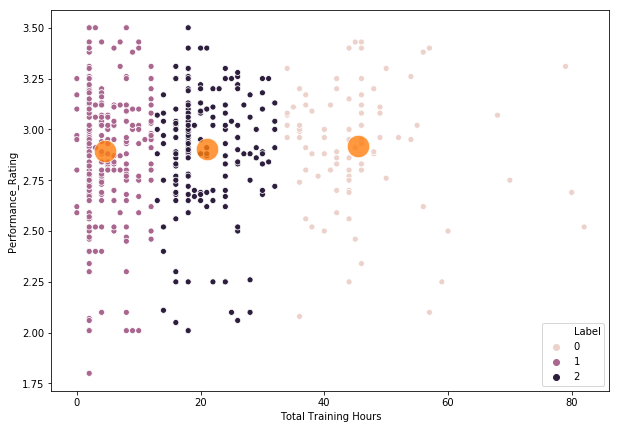

In [15]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3['Total Training Hours'], y=df_k3.Performance_Rating, hue=df_k3.Label)

centers = kmeans.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8)

### Elbow Method

In [16]:
#Set range for k
range_n_clusters= [2,3,4,5,6,7,8,9,10]

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
    kmeans.fit(df_temp)
    score = kmeans.inertia_
    scores.append(score)
    print(str(i) +"\t" +str(score))

2	40178.7504352956
3	16214.18177979289
4	10738.340535679441
5	6493.381769299089
6	4613.3207884921385
7	3212.9165656579034
8	2280.167339690323
9	1757.8511828809194
10	1457.0882596077668


Text(0,0.5,'Score')

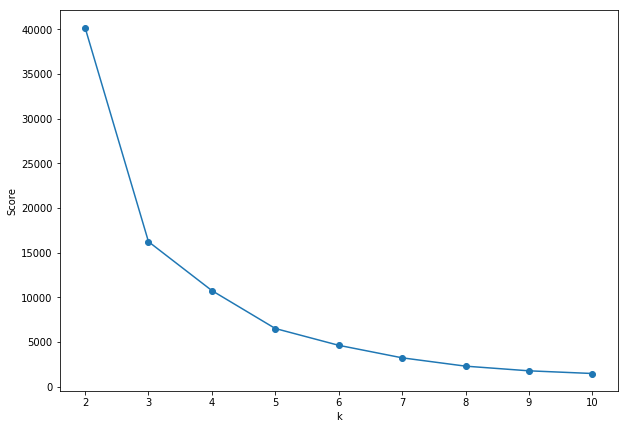

In [17]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

### Test with k=3 with scaled data

In [8]:
df_temp_scaled = df_scaled[['Total Training Hours', 'Performance_Rating']]

In [9]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(df_temp_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [10]:
#Output of K-Means is the cluster label
k3_labels = kmeans.labels_

#Attach labels to the scaled DataFrame
df_k_scaled = df_temp_scaled.copy()
df_k_scaled['Label'] = k3_labels

In [59]:
#View the dataset
df_k_scaled.head()

,Total Training Hours,Performance_Rating,Label
0,1.545455,-0.028571,2
1,0.272727,0.971429,1
2,0.272727,-0.057143,1
3,0.772727,-0.142857,2
4,-0.454545,-0.885714,0


In [13]:
#Check the size of each cluster
df_k_scaled.Label.value_counts()

1    297
0    146
2    122
Name: Label, dtype: int64

In [14]:
df_k_scaled[(df_k_scaled.Label == 1)].describe()

,Total Training Hours,Performance_Rating,Label
count,297.000000,297.000000,297.0
mean,-0.122130,0.310871,1.0
std,0.341460,0.468023,0.0
min,-0.545455,-0.457143,1.0
25%,-0.454545,0.000000,1.0
50%,-0.227273,0.200000,1.0
75%,0.181818,0.600000,1.0
max,0.636364,1.542857,1.0


In [15]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_k_scaled, index = ['Label'], values = ['Total Training Hours','Performance_Rating'], 
               aggfunc=[np.mean,np.min, np.max])

mean                                    amin  \
      Performance_Rating Total Training Hours Performance_Rating   
Label                                                              
0              -1.253425            -0.078767          -3.314286   
1               0.310871            -0.122130          -0.457143   
2              -0.022014             1.287258          -2.028571   

                                         amax                       
      Total Training Hours Performance_Rating Total Training Hours  
Label                                                               
0                -0.545455          -0.514286             2.045455  
1                -0.545455           1.542857             0.636364  
2                 0.545455           1.342857             3.181818

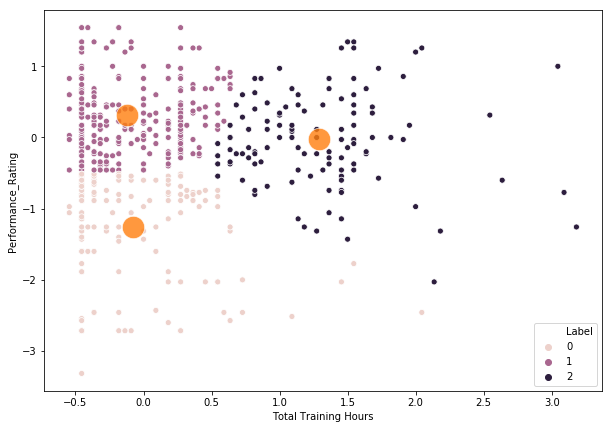

In [22]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k_scaled['Total Training Hours'], y=df_k_scaled.Performance_Rating, hue=df_k_scaled.Label)

centers = kmeans.cluster_centers_
sns.scatterplot(centers[:,0], centers[:,1], s=500, alpha=0.8)

* Cluster 0 - Low Training Hours, Low Performance Rating
* Cluster 1 - Low Training Hours, High Performance Rating
* Cluster 2 - High Training Hours, High Performance Rating

In [11]:
#Attach labels to the original DataFrame
df_2 = df.copy()
df_2 = df_2[['Total Training Hours', 'Performance_Rating', 'Core Training Hours', 
             'Function Specific Training Hours', 'Leadership & Management Training Hours', 'Tenure']]
df_2['Label'] = k3_labels
df_2.head()

,Total Training Hours,Performance_Rating,Core Training Hours,Function Specific Training Hours,Leadership & Management Training Hours,Tenure,Label
0,46.0,2.95,2.0,0.0,44.0,17,2
1,18.0,3.30,2.0,0.0,16.0,15,1
2,18.0,2.94,2.0,0.0,16.0,10,1
3,29.0,2.91,5.0,0.0,24.0,17,2
4,2.0,2.65,2.0,0.0,0.0,2,0


In [13]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
pd.pivot_table(df_2, index = ['Label'], values = ['Total Training Hours','Performance_Rating', 
                                                  'Core Training Hours', 'Function Specific Training Hours', 
                                                  'Leadership & Management Training Hours', 'Tenure'], 
               aggfunc=[np.mean])

mean                                   \
      Core Training Hours Function Specific Training Hours   
Label                                                        
0                3.842466                         1.712329   
1                4.171717                         2.084175   
2               11.508197                         5.008197   

                                                                            \
      Leadership & Management Training Hours Performance_Rating     Tenure   
Label                                                                        
0                                   4.712329           2.521301  10.349315   
1                                   3.057239           3.068805  10.232323   
2                                  23.803279           2.952295  10.049180   

                            
      Total Training Hours  
Label                       
0                10.267123  
1                 9.313131  
2                40.319672

In [60]:
df_3 = df.copy()
df_3['Label'] = k3_labels

df_3.head()

,Employee Code,Organization,Department or Branch,Functional Title,Rank,Employee Status,Performance_Rating,Tenure,Total Training Hours,Core Training Hours,Function Specific Training Hours,Leadership & Management Training Hours,External Training Hours,Internal Training Hours,Budget per Trainee,Label
0,13-0101,SHARED SERVICES,Marketing Department,Marketing Consumer Insights & Activation,Mgr,Regular,2.95,17,46.0,2.0,0.0,44.0,0.0,46.0,40000,2
1,92-0301,RETAIL,Operations Department,Operations Reinsurance Administration,Mgr,Regular,3.30,15,18.0,2.0,0.0,16.0,0.0,18.0,40000,1
2,06-0801,SHARED SERVICES,IT Life Applications Development Section,IT Life Applications Development Programming M...,Mgr,Regular,2.94,10,18.0,2.0,0.0,16.0,0.0,18.0,40000,1
3,11-0107,RETAIL,Microinsurance Department,Microinsurance Accounts,Supv,Regular,2.91,17,29.0,5.0,0.0,24.0,0.0,29.0,20000,2
4,CP161108,RETAIL,Microinsurance Department,Partner Relationship Staff Assistant,Staff II,Regular,2.65,2,2.0,2.0,0.0,0.0,0.0,2.0,10000,0


#### Cluster 0 - Low Training Hours, Low Performance Rating
* Average Training Hours: **10.27 hours**
* Average Performance Rating: **2.52**
* Majority belongs to Organization: **RETAIL (36%)**
* Majority belongs to Rank: **Staff IV**

In [69]:
df_3_cluster0 = df_3[(df_3.Label == 0)]
df_3_cluster0['Organization'].value_counts()

RETAIL               52
INSTITUTIONAL        37
SHARED SERVICES      36
SHARED FINANCIALS    21
Name: Organization, dtype: int64

In [70]:
df_3_cluster0['Rank'].value_counts()

Staff IV     26
Supv         25
Mgr          19
AM           17
Staff III    17
Staff I      14
Staff II     12
VP            8
FVP           4
AVP           4
Name: Rank, dtype: int64

#### Cluster 1 - Low Training Hours, High Performance Rating
* Average Training Hours: **9.31 hours**
* Average Performance Rating: **3.07**
* Majority belongs to Organization: **RETAIL**
* Majority belongs to Rank: **Staff III**

In [72]:
df_3_cluster1 = df_3[(df_3.Label == 1)]
df_3_cluster1['Organization'].value_counts()

RETAIL               121
INSTITUTIONAL         83
SHARED SERVICES       57
SHARED FINANCIALS     36
Name: Organization, dtype: int64

In [73]:
df_3_cluster1['Rank'].value_counts()

Staff III         48
Staff IV          41
Supv              41
Mgr               36
Staff II          34
Staff I           34
AM                24
VP                14
AVP               13
FVP               10
SVP                1
Pres & CEO/SVP     1
Name: Rank, dtype: int64

#### Cluster 2 - High Training Hours, High Performance Rating
* Average Training Hours: **40.32 hours**
* Average Performance Rating: **2.96**
* Majority belongs to Organization: **RETAIL**
* Majority belongs to Rank: **Manager**

In [75]:
df_3_cluster2 = df_3[(df_3.Label == 2)]
df_3_cluster2['Organization'].value_counts()

RETAIL               45
INSTITUTIONAL        36
SHARED SERVICES      29
SHARED FINANCIALS    12
Name: Organization, dtype: int64

In [ ]:
print 'RETAIL' 

In [76]:
df_3_cluster2['Rank'].value_counts()

Mgr          28
Supv         27
AM           21
AVP          13
Staff III    13
Staff II      8
Staff I       8
Staff IV      4
Name: Rank, dtype: int64

In [19]:
#Set range for k
range_n_clusters= [2,3,4,5,6,7,8,9,10]

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
    kmeans.fit(df_temp_scaled)
    score = kmeans.inertia_
    scores.append(score)
    print(str(i) +"\t" +str(score))

2	448.65398235817014
3	285.11719276179565
4	212.64251371390324
5	176.98496868068378
6	145.73330745030944
7	120.32303082610404
8	104.55447973160855
9	90.62112055628195
10	78.5558454410143


Text(0,0.5,'Score')

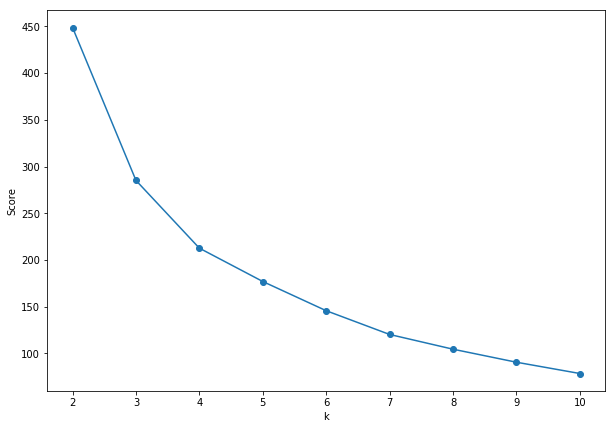

In [20]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

### HIERARCHICAL CLUSTERING

In [77]:
from scipy.cluster import hierarchy

In [80]:
#Instantiate the Algorithm
#Linkage performs hierarchical/agglomerative clustering.

linked_full = hierarchy.linkage(df_temp, method='single') 

In [81]:
k = 3
clusters_k_full = hierarchy.fcluster(linked_full, k, criterion='maxclust')

In [82]:
#Create the dataframe
df_h3 = df.copy()
df_h3['Label'] = clusters_k_full

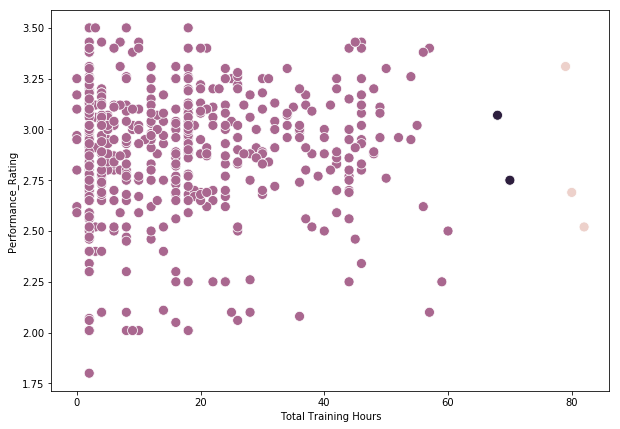

In [85]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_h3['Total Training Hours'], y=df_h3.Performance_Rating, 
                hue=df_h3.Label, s=100, legend=False)

### HIERARCHICAL CLUSTERING with scaled data

In [86]:
#Instantiate the Algorithm
#Linkage performs hierarchical/agglomerative clustering.

linked_full = hierarchy.linkage(df_temp_scaled, method='single') 

In [87]:
k = 3
clusters_k_full = hierarchy.fcluster(linked_full, k, criterion='maxclust')

In [88]:
#Create the dataframe
df_scaled_h3 = df.copy()
df_scaled_h3['Label'] = clusters_k_full

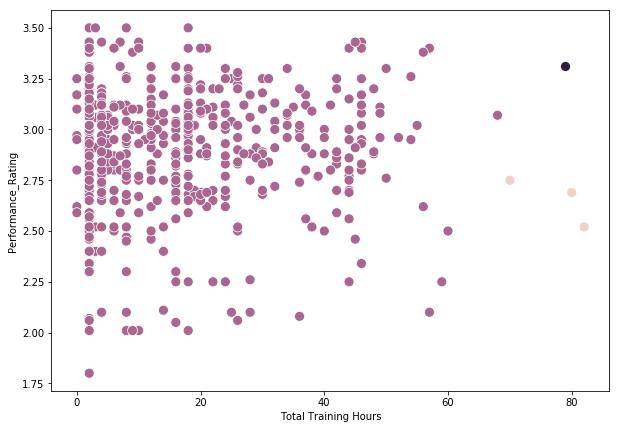

In [89]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_scaled_h3['Total Training Hours'], y=df_scaled_h3.Performance_Rating, 
                hue=df_scaled_h3.Label, s=100, legend=False)

### PCA

In [91]:
from sklearn.decomposition import PCA

In [92]:
features = ['Total Training Hours', 'Core Training Hours', 'Function Specific Training Hours', 
            'External Training Hours', 'Performance_Rating']

# Separating out the features
X = df.loc[:, features].values

In [93]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300,random_state=30) 
#best_vals = df[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( X )

In [94]:
df_pca = df.copy()
df_pca["cluster"] = y_pred
clusters = y_pred

In [95]:
matrix = df_pca[features].as_matrix()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [96]:
# Standardizing the features
X_scaled = StandardScaler().fit_transform(matrix)

In [97]:
X_scaled

array([[ 1.90919229, -0.43182922, -0.40763277, -0.29038829,  0.15650192],
       [ 0.1120114 , -0.43182922, -0.40763277, -0.29038829,  1.30167322],
       [ 0.1120114 , -0.43182922, -0.40763277, -0.29038829,  0.12378274],
       ...,
       [ 1.65245216,  1.45039651, -0.40763277, -0.29038829, -0.03981316],
       [-1.04331917, -0.66710744, -0.40763277, -0.29038829,  1.13807732],
       [-0.52983892, -0.66710744, -0.40763277, -0.29038829, -0.43244332]])

In [98]:
pca = PCA(n_components=5)
matrix_3D = pca.fit_transform(X_scaled)
PCA_cols = list({'PC1', 'PC2', 'PC3', 'PC4', 'PC5'})
mat = pd.DataFrame(matrix_3D,columns =PCA_cols )
mat['cluster'] = pd.Series(clusters)
mat.columns

Index([u'PC2', u'PC3', u'PC1', u'PC4', u'PC5', u'cluster'], dtype='object')

In [99]:
mat.head()

,PC2,PC3,PC1,PC4,PC5,cluster
0,0.421597,-0.675937,-0.047844,1.795292,-0.496466,2
1,-0.491906,-0.525379,-1.218476,0.297889,-0.229019,1
2,-0.484216,-0.071042,-0.135993,0.393674,-0.227705,1
3,0.000833,-0.500052,0.113007,0.782706,-0.226103,1
4,-0.995751,0.633394,0.668453,-0.331611,-0.073089,0


/anaconda2/lib/python2.7/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/anaconda2/lib/python2.7/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


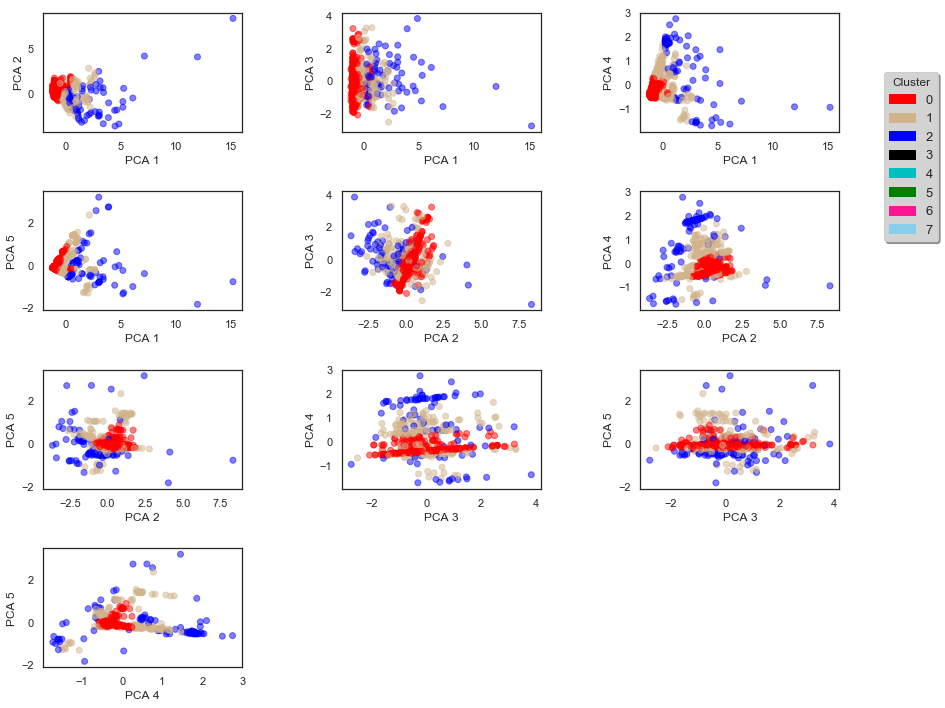

In [100]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 5):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[PCA_cols[ix]], mat[PCA_cols[iy]], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# LEGEND
comp_handler = []
for i in range(8):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

/anaconda2/lib/python2.7/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


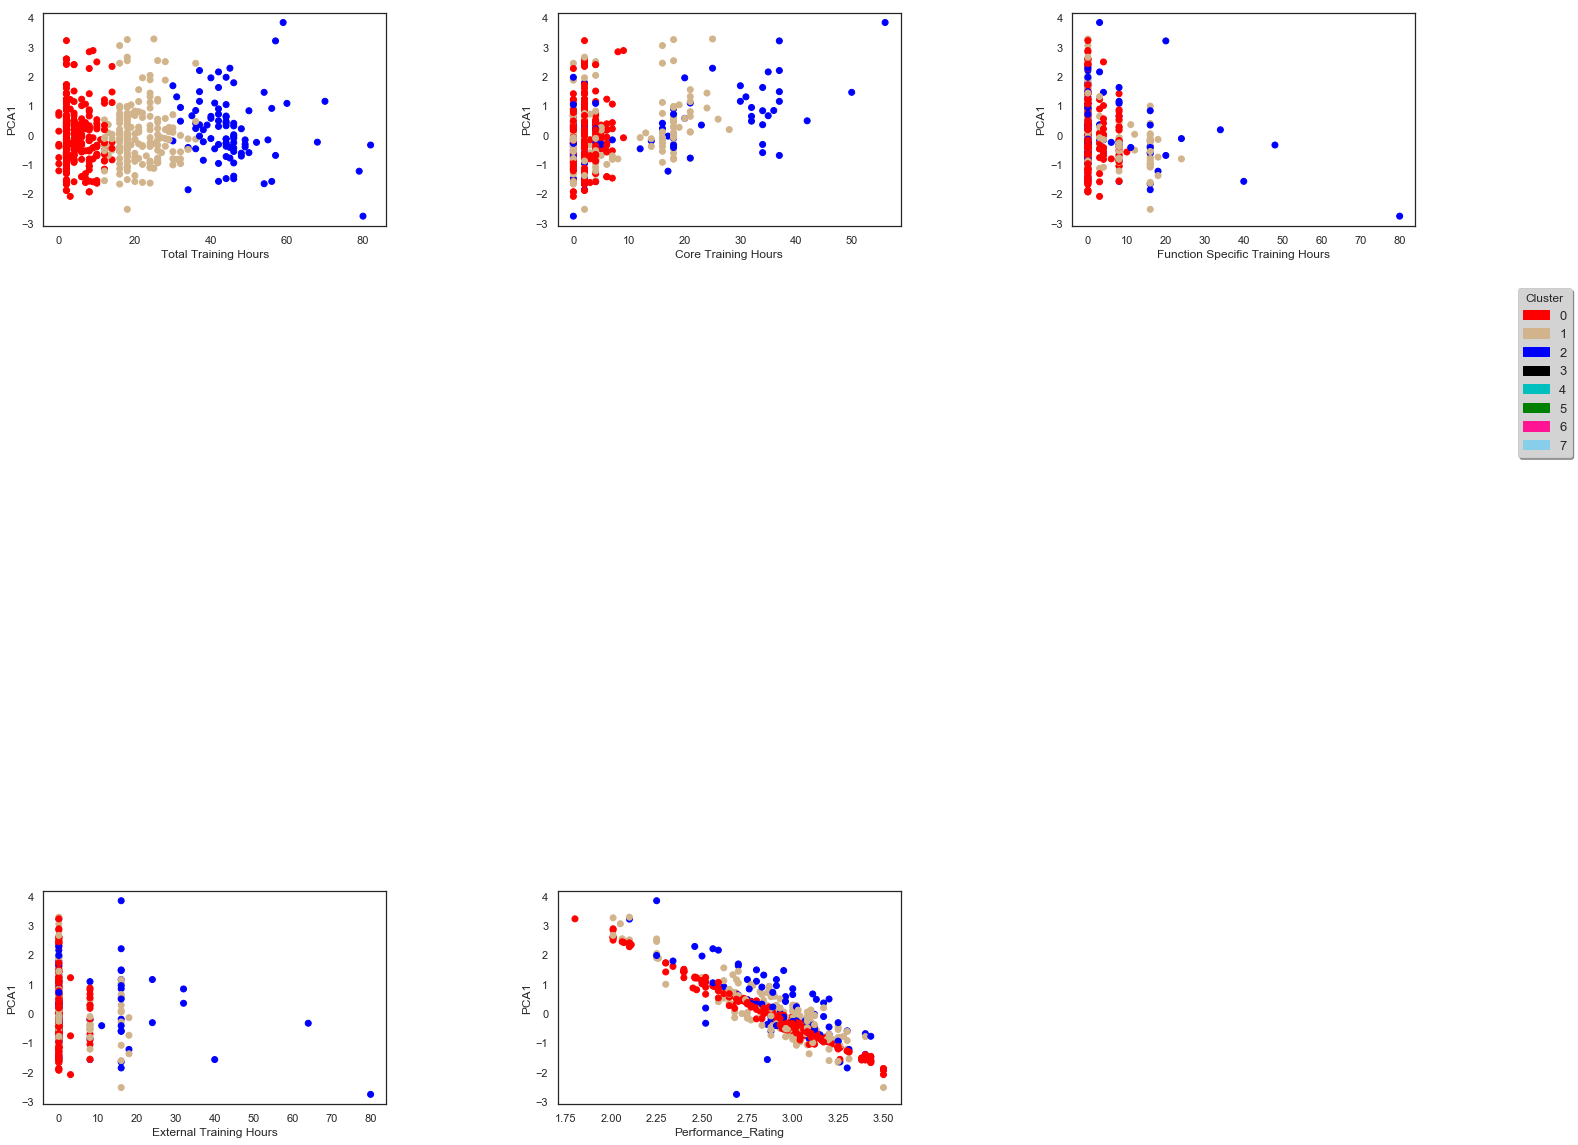

In [102]:
## Create a color map
LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (20,40))

ax = fig.add_subplot(4,3,1)
ax.scatter(x = df["Total Training Hours"], y=mat['PC1'],c=label_color)
plt.xlabel('Total Training Hours')
plt.ylabel("PCA1")

ax = fig.add_subplot(4,3,2)
ax.scatter(x = df["Core Training Hours"], y=mat['PC1'],c=label_color)
plt.xlabel('Core Training Hours')
plt.ylabel("PCA1")

ax = fig.add_subplot(4,3,3)
ax.scatter(x = df["Function Specific Training Hours"], y=mat['PC1'],c=label_color)
plt.xlabel('Function Specific Training Hours')
plt.ylabel("PCA1")

ax = fig.add_subplot(4,3,4)
ax.scatter(x = df["External Training Hours"], y=mat['PC1'],c=label_color)
plt.xlabel('External Training Hours')
plt.ylabel("PCA1")

ax = fig.add_subplot(4,3,5)
ax.scatter(x = df["Performance_Rating"], y=mat['PC1'],c=label_color)
plt.xlabel('Performance_Rating')
plt.ylabel("PCA1")


#_______________________________________________
# LEGEND
comp_handler = []
for i in range(8):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

In [29]:
wcss = []

for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

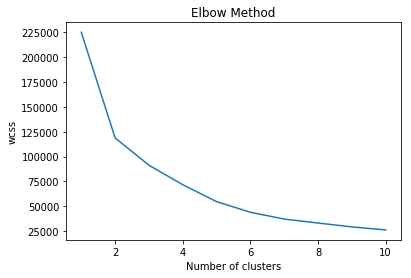

In [30]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()